## Project Name:
### Vertical Permeablity Prediciton using Regression Techniques with the help of core data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv("clean core data.csv")

In [3]:
df.head()

,DEPTH,OrigDepth,CORE_NO,SAMPLE,CKHG,CKHL,CKVG,CKVL,CPOR
0,3839.15,3837.55,1,3,25.20,21.40,3.94,3.16,10.8
1,3840.10,3838.50,1,8,1130.00,1080.00,1100.00,1040.00,17.2
2,3841.00,3839.40,1,13,6.54,5.36,1200.00,1140.00,12.7
3,3842.05,3840.45,1,18,168.00,152.00,17.60,14.80,21.0
4,3843.05,3841.45,1,23,65.00,57.00,19.40,16.40,22.1


In [4]:
## removing unnecessary columns
df = df.drop(['OrigDepth','CORE_NO','SAMPLE'],axis=1)

In [5]:
df.head()

,DEPTH,CKHG,CKHL,CKVG,CKVL,CPOR
0,3839.15,25.20,21.40,3.94,3.16,10.8
1,3840.10,1130.00,1080.00,1100.00,1040.00,17.2
2,3841.00,6.54,5.36,1200.00,1140.00,12.7
3,3842.05,168.00,152.00,17.60,14.80,21.0
4,3843.05,65.00,57.00,19.40,16.40,22.1


### Dependent Variable : 
#### Vertical liquid Permeablity [CKVL]

In [6]:
df.columns

Index(['DEPTH', 'CKHG', 'CKHL', 'CKVG', 'CKVL', 'CPOR'], dtype='object')

In [7]:
## arranging our data 
df= df[['DEPTH', 'CKHG', 'CKHL', 'CKVG', 'CPOR','CKVL']]

In [8]:
df.head()

,DEPTH,CKHG,CKHL,CKVG,CPOR,CKVL
0,3839.15,25.20,21.40,3.94,10.8,3.16
1,3840.10,1130.00,1080.00,1100.00,17.2,1040.00
2,3841.00,6.54,5.36,1200.00,12.7,1140.00
3,3842.05,168.00,152.00,17.60,21.0,14.80
4,3843.05,65.00,57.00,19.40,22.1,16.40


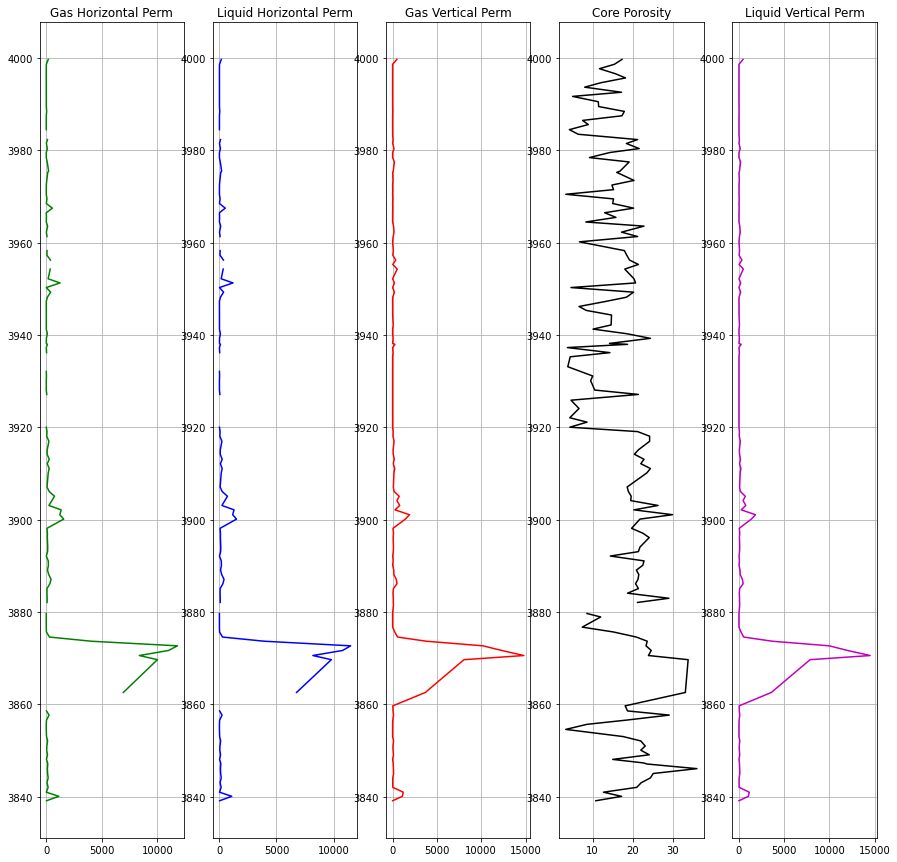

In [9]:
### plotting our data with respect to the depth
fig=plt.subplots(figsize=(15,15))
ax1=plt.subplot2grid((3,5), (0,0), rowspan=3,colspan=1)
ax2=plt.subplot2grid((3,5), (0,1), rowspan=3,colspan=1)
ax3=plt.subplot2grid((3,5), (0,2), rowspan=3,colspan=1)
ax4=plt.subplot2grid((3,5), (0,3), rowspan=3,colspan=1)
ax5=plt.subplot2grid((3,5), (0,4), rowspan=3,colspan=1)


#CKHG
ax1.plot('CKHG','DEPTH', data=df, color='green')
ax1.set_title('Gas Horizontal Perm')
ax1.grid()

#ckhl
ax2.plot('CKHL','DEPTH', data=df, color='blue')
ax2.set_title('Liquid Horizontal Perm')
ax2.grid()

#CKVG
ax3.plot('CKVG','DEPTH', data=df, color='red')
ax3.set_title('Gas Vertical Perm')
ax3.grid()

#cpor
ax4.plot('CPOR','DEPTH', data=df, color='k')
ax4.set_title('Core Porosity')
ax4.grid()

#ckvl
ax5.plot('CKVL','DEPTH', data=df, color='m')
ax5.set_title('Liquid Vertical Perm')
ax5.grid()

### Seeing the log we see that we have some missing data
#### Let's find out

In [10]:
df.isnull().sum()

DEPTH     0
CKHG     10
CKHL     10
CKVG      0
CPOR      1
CKVL      0
dtype: int64

### Let us replace this missing data by mean of the  values


In [11]:
ckhgmean= df['CKHG'].mean() #hor gas per mean
df['CKHG']= df['CKHG'].fillna(ckhgmean)
ckhlmean= df['CKHL'].mean() #hor liq per mean
df['CKHL']= df['CKHL'].fillna(ckhlmean)
pormean= df['CPOR'].mean() #por mean
df['CPOR']= df['CPOR'].fillna(pormean)

In [12]:
df.isnull().sum() ## no null values left

DEPTH    0
CKHG     0
CKHL     0
CKVG     0
CPOR     0
CKVL     0
dtype: int64

## Outlier Analysis
### We also see that there are some outliers, let us visulaize them with the help of a Box Plot

C:\Users\khank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\khank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\khank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\khank\anaconda3\lib\si

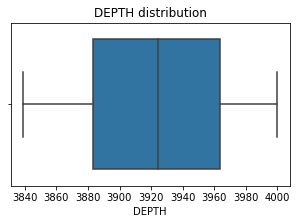

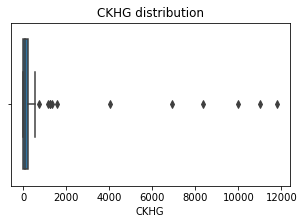

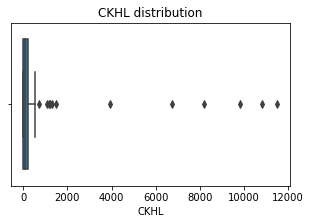

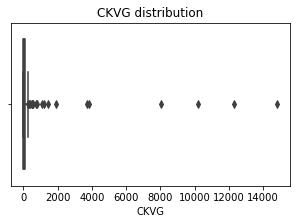

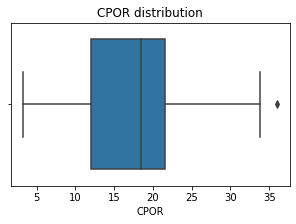

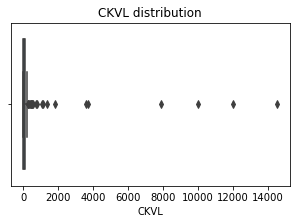

In [13]:
def outlier(data,column):
    plt.figure(figsize=(5,3))
    sns.boxplot(data[column])
    plt.title("{} distribution".format(column))

for i in df.columns:
    outlier(df,i)

### As we see there are lot of Outliers in the Horizontal and Vertical Permeability Sections, these can be due to the device error or it can be a highly fractured zone.
### Let us handle the outliers

#### Findind the min and max value for every feature

In [14]:
def end_value_show(data,column):
    print("Min value of {} is {} \nMax value of {} is {}".format(column,data[column].min(),column,data[column].max()))
for i in df.columns:
    end_value_show(df,i)

Min value of DEPTH is 3839.15 
Max value of DEPTH is 3999.7
Min value of CKHG is 0.023 
Max value of CKHG is 11800.0
Min value of CKHL is 0.012 
Max value of CKHL is 11500.0
Min value of CKVG is 0.03 
Max value of CKVG is 14800.0
Min value of CPOR is 3.3 
Max value of CPOR is 36.0
Min value of CKVL is 0.017 
Max value of CKVL is 14500.0


#### Replacing the Outliers with values near to the correct values

In [15]:
df=df[df["CKHG"]<2000]
df=df[df["CKHL"]<2000]
df=df[df["CKVG"]<2500]
df=df[df["CKVL"]<2500]

### Let us again plot our Data

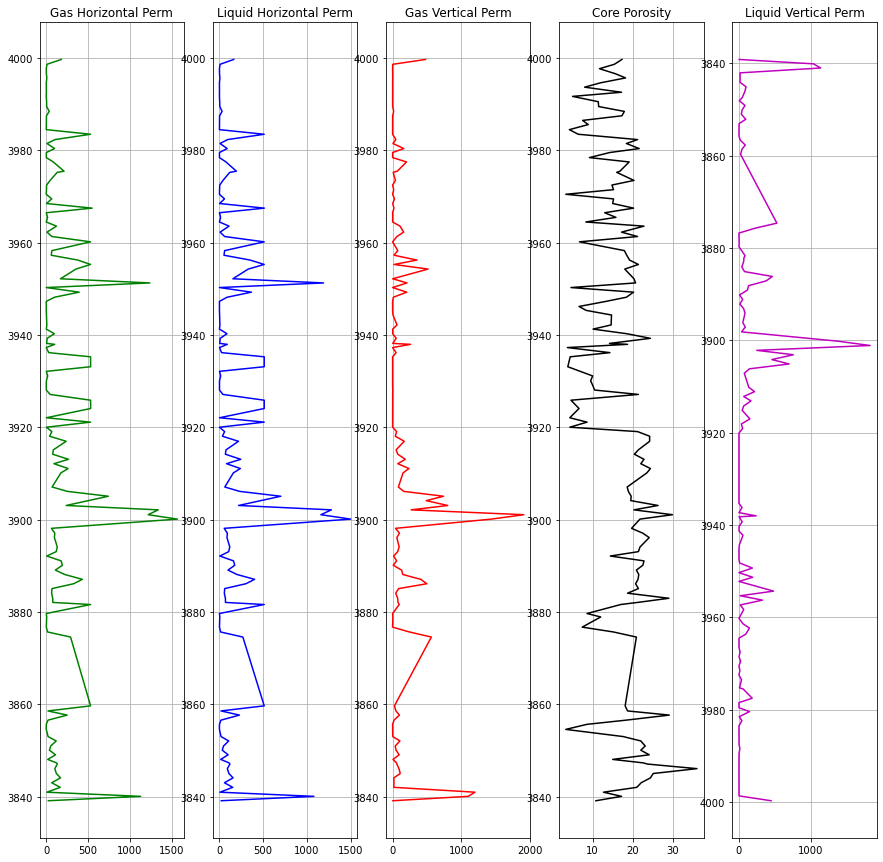

In [16]:
### plotting our data with respect to the depth
fig=plt.subplots(figsize=(15,15))
ax1=plt.subplot2grid((3,5), (0,0), rowspan=3,colspan=1)
ax2=plt.subplot2grid((3,5), (0,1), rowspan=3,colspan=1)
ax3=plt.subplot2grid((3,5), (0,2), rowspan=3,colspan=1)
ax4=plt.subplot2grid((3,5), (0,3), rowspan=3,colspan=1)
ax5=plt.subplot2grid((3,5), (0,4), rowspan=3,colspan=1)


#CKHG
ax1.plot('CKHG','DEPTH', data=df, color='green')
ax1.set_title('Gas Horizontal Perm')
plt.gca().invert_yaxis()
ax1.grid()

#ckhl
ax2.plot('CKHL','DEPTH', data=df, color='blue')
ax2.set_title('Liquid Horizontal Perm')
plt.gca().invert_yaxis()
ax2.grid()

#CKVG
ax3.plot('CKVG','DEPTH', data=df, color='red')
ax3.set_title('Gas Vertical Perm')
plt.gca().invert_yaxis()
ax3.grid()

#cpor
ax4.plot('CPOR','DEPTH', data=df, color='k')
ax4.set_title('Core Porosity')
plt.gca().invert_yaxis()
ax4.grid()

#ckvl
ax5.plot('CKVL','DEPTH', data=df, color='m')
ax5.set_title('Liquid Vertical Perm')
plt.gca().invert_yaxis()
ax5.grid()

### Also let us smoothen our data a bit as we see in the Porosity log our data was not smoothened

In [17]:
lst = list(df)
df1 = df.copy(deep=True)
window = 17
for i in lst:
    df1[i] = pd.Series(df1[i]).rolling(window=window, min_periods=1).mean()  ## smoothning the data with the help of mean

### Let us see how our data looks after smoothning the edges

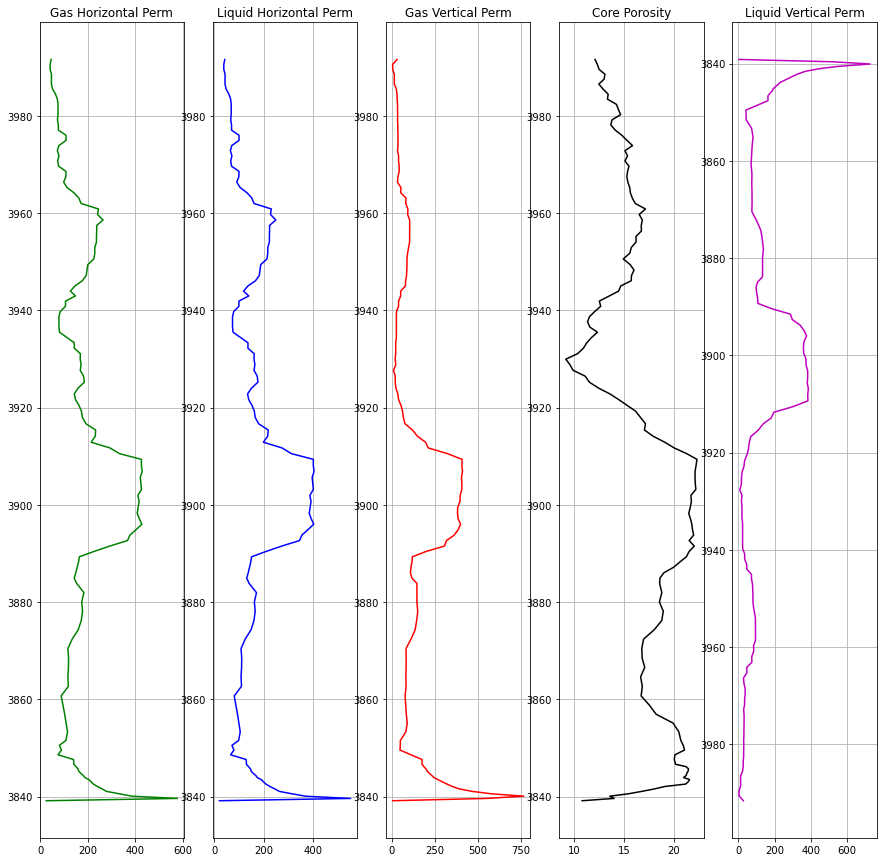

In [18]:
### plotting our data with respect to the depth
fig=plt.subplots(figsize=(15,15))
ax1=plt.subplot2grid((3,5), (0,0), rowspan=3,colspan=1)
ax2=plt.subplot2grid((3,5), (0,1), rowspan=3,colspan=1)
ax3=plt.subplot2grid((3,5), (0,2), rowspan=3,colspan=1)
ax4=plt.subplot2grid((3,5), (0,3), rowspan=3,colspan=1)
ax5=plt.subplot2grid((3,5), (0,4), rowspan=3,colspan=1)


#CKHG
ax1.plot('CKHG','DEPTH', data=df1, color='green')
ax1.set_title('Gas Horizontal Perm')
plt.gca().invert_yaxis()
ax1.grid()

#ckhl
ax2.plot('CKHL','DEPTH', data=df1, color='blue')
ax2.set_title('Liquid Horizontal Perm')
plt.gca().invert_yaxis()
ax2.grid()

#CKVG
ax3.plot('CKVG','DEPTH', data=df1, color='red')
ax3.set_title('Gas Vertical Perm')
plt.gca().invert_yaxis()
ax3.grid()

#cpor
ax4.plot('CPOR','DEPTH', data=df1, color='k')
ax4.set_title('Core Porosity')
plt.gca().invert_yaxis()
ax4.grid()

#ckvl
ax5.plot('CKVL','DEPTH', data=df1, color='m')
ax5.set_title('Liquid Vertical Perm')
plt.gca().invert_yaxis()
ax5.grid()

In [20]:
df.head()

,DEPTH,CKHG,CKHL,CKVG,CPOR,CKVL
0,3839.15,25.20,21.40,3.94,10.8,3.16
1,3840.10,1130.00,1080.00,1100.00,17.2,1040.00
2,3841.00,6.54,5.36,1200.00,12.7,1140.00
3,3842.05,168.00,152.00,17.60,21.0,14.80
4,3843.05,65.00,57.00,19.40,22.1,16.40


#### Let us scale our Data with the help of Standard Scaler 

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scale= StandardScaler()

In [31]:
new= scale.fit_transform(df)

In [39]:
df_new= pd.DataFrame(new,columns= df.columns)

In [42]:
df_new.head() ### data frame is scaled

,DEPTH,CKHG,CKHL,CKVG,CPOR,CKVL
0,-1.798701,-0.512229,-0.509000,-0.428281,-0.875446,-0.419569
1,-1.778594,3.449035,3.458589,3.600385,0.096508,3.589527
2,-1.759545,-0.579134,-0.569117,3.967944,-0.586897,3.976192
3,-1.737322,-0.000219,-0.019517,-0.378072,0.673606,-0.374561
4,-1.716156,-0.369526,-0.375573,-0.371456,0.840661,-0.368375


In [109]:
pred_var = ['CKHL','CPOR']  ## we will be finding out an equation between the Horizontal and Vertical permeablity of the liquid

In [110]:
### splitting the data

x= df[pred_var] ## independent var
y= df['CKVL'] ## dependent var

In [111]:
print(x.shape,y.shape)

(135, 2) (135,)


### Creating a Polynomial Regression Model


### We will write a Polynomial Fucntion to do all the process in one go !!

In [78]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures



def my_polynomial_regression(poly_degree, x, y, test_size=0.3, rand_state=42):
    
    poly_features= PolynomialFeatures(degree=poly_degree)
    
    # transforms the existing features to higher degree features.
    X_poly = pd.DataFrame(poly_features.fit_transform(x))   
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=rand_state)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train, y_train)
    
  
    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train)
  
    # predicting on test data-set
    y_test_predicted = poly_model.predict(X_test)
  
   # evaluating the model on training dataset
    MSE_train = round(np.mean(np.square(y_train - y_train_predicted)),2)
    RMSE_train = round(np.sqrt(MSE_train),2)

  
    # evaluating the model on test dataset
    MSE_test = round(np.mean(np.square(y_test - y_test_predicted)),2)
    RMSE_test = round(np.sqrt(MSE_test),2)

    
    return poly_degree, RMSE_train, RMSE_test

Our main aim is to get the least RMSE for the test data because that is the only thing which tells us how our model will perform in the real data 

Let us check our model for different ploynomial degress,to find the optimum number of degree

In [85]:
### a for loop which will tell the rmse for different degrees
evaluation = []
for i in range(1,6): ## checking from degree 1 to 5
    evaluation.append(my_polynomial_regression(poly_degree=i, x=x,y=y))
    
output = pd.DataFrame(evaluation, columns=['Degree', 'RMSE_train', 'RMSE_test'])
output

,Degree,RMSE_train,RMSE_test
0,1,191.47,257.67
1,2,190.55,279.00
2,3,190.52,274.72
3,4,179.81,610.00
4,5,177.17,981.38


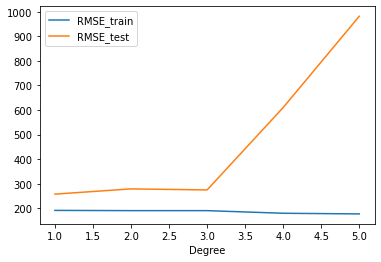

In [86]:
output.set_index('Degree').plot()
plt.show()

Let us use cross valiadation to hypertune our model


In [87]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

We will write a function for calcluating our RMSE for our CV method

In [90]:
RMSE_CV=[]
iterator= range(1,8) # the second number is polynomial degree 
for i in iterator:
    X_train, X_test, y_train, y_test = train_test_split(PolynomialFeatures(degree=i).fit_transform(x.values.reshape(-1,1)), y, test_size=0.3, random_state=100)
    MSE = -cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
    RMSE_CV.append(np.sqrt(MSE).mean())
    
output = pd.DataFrame(list(iterator), columns=['Poly degree'])
output['RMSE_CV']=RMSE_CV

output

,Poly degree,RMSE_CV
0,1,175.281807
1,2,187.802100
2,3,243.687261
3,4,243.667804
4,5,3277.900878
5,6,18221.404992
6,7,57246.190913


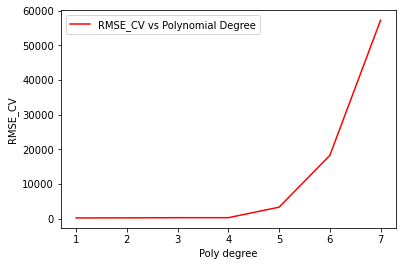

In [91]:
sns.lineplot(x='Poly degree', y='RMSE_CV', data=output , color='r', label="RMSE_CV vs Polynomial Degree")
plt.show()

##### Creating a Polynomial model with 2 degree as it has least RMSE 

In [106]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.30,random_state=42)
poly = PolynomialFeatures(degree = 1) 
X_poly = poly.fit_transform(X_train) 
  
#X_poly

PolyReg = LinearRegression() 
PolyReg.fit(X_poly, y_train)

LinearRegression()

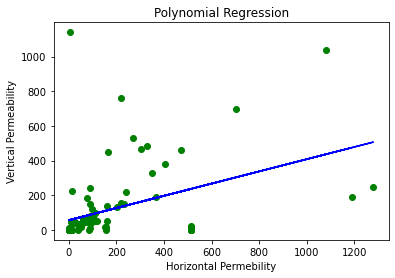

In [107]:
# Visualise the Polynomial Regression Results for train data
plt.scatter(X_train, y_train, color = 'green') 
  
plt.plot(X_train, PolyReg.predict(poly.fit_transform(X_train)), color = 'blue') 
plt.title('Polynomial Regression') 
plt.xlabel('Horizontal Permebility') 
plt.ylabel('Vertical Permeability') 
  
plt.show()

In [108]:
#Predicted Height from test dataset w.r.t Polynomial Regression
y_predict_pr = PolyReg.predict(poly.fit_transform(X_test))

#Model Evaluation using R-Square for Polynomial Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_pr)
print('R-Square Error associated with Polynomial Regression is:', r_square)


R-Square Error associated with Polynomial Regression is: 0.44001245500787567


## Multiple Linear Regression 

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [115]:
reg_model = LinearRegression()

In [116]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [117]:
y_hat = reg_model.predict(X_test)
df_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat, 'resid': y_test - y_hat})
df_predictions.head()


,actuals,predictions,resid
104,146.00,55.695859,90.304141
73,1.99,12.825308,-10.835308
111,23.30,60.428344,-37.128344
19,88.50,202.061124,-113.561124
48,88.60,115.656651,-27.056651


In [118]:
print('The coefficients of the regression: ',reg_model.coef_)

print('The intercept of the regression: ',reg_model.intercept_)

The coefficients of the regression:  [0.33480356 6.06578497]
The intercept of the regression:  -51.12323278784852


In [119]:
# Let's create a new data frame with the names of the features
reg_summary = pd.DataFrame(data = X_train.columns, columns=['Features'])
reg_summary ['Coefficients'] = np.round(reg_model.coef_,4)
reg_summary

,Features,Coefficients
0,CKHL,0.3348
1,CPOR,6.0658


### Evaluation

In [120]:
## r squared

print('Training data R-squared:', np.round(reg_model.score(X_train, y_train),3))
print('Test data R-squared:', np.round(reg_model.score(X_test, y_test),3))


Training data R-squared: 0.215
Test data R-squared: 0.479


In [121]:
## adjusted r squared

def adj_R2(X,y): 
    R2 = reg_model.score(X,y)
    n  = X.shape[0]
    k  = X.shape[1]
    return np.round(1-(1-R2)*(n-1)/(n-k-1),3)

print('ADJ R2 for trian data :',adj_R2(X_train,y_train))

print('ADj R2 for test data :',adj_R2(X_test,y_test))

ADJ R2 for trian data : 0.2
ADj R2 for test data : 0.436


In [122]:
## mse and rmse

MSE_test = np.mean(np.square(df_predictions['resid']))
print('MSE Test :',np.round(MSE_test,3))

RMSE_test = np.sqrt(MSE_test)
print('RMSE Test :',np.round(RMSE_test,3))

MSE Test : 90317.264
RMSE Test : 300.528


### Cross Validation

In [123]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [124]:
my_estimator = LinearRegression()
R2 = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="r2")
R2

array([ 0.23240689,  0.2706844 , -1.9616864 ,  0.38965724,  0.03783237])

In [125]:
R2_CV = np.mean(R2)
np.round(R2_CV,3)

-0.206

In [126]:
## nmse
NMSE = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")

MSE= -NMSE
MSE

array([  2676.90355849,  55254.98924833,   9448.96283244,  27916.1530588 ,
         5131.25361135,  15295.78185808,  18771.27849948,  63124.35033403,
       143349.12331971,  18258.00141061])

In [127]:
MSE_CV = np.mean(MSE)
np.round(MSE_CV,3)

35922.68

## Regression using Stats Library
### This solution is accepted

In [139]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
model = smf.ols(formula='CKVL ~ CKHL + CPOR', data=df)
final_model = model.fit()
final_model.params

Intercept   -104.985241
CKHL           0.563733
CPOR           7.729297
dtype: float64

In [140]:
## prepare data for visualisation
x_surf, y_surf = np.meshgrid(np.linspace(df.CKHL.min(), df.CKHL.max(), 100),np.linspace(df.CPOR.min(), df.CPOR.max(), 100))
onlyX = pd.DataFrame({'CKHL': x_surf.ravel(), 'CPOR': y_surf.ravel()})
predictions=final_model.predict(exog=onlyX)

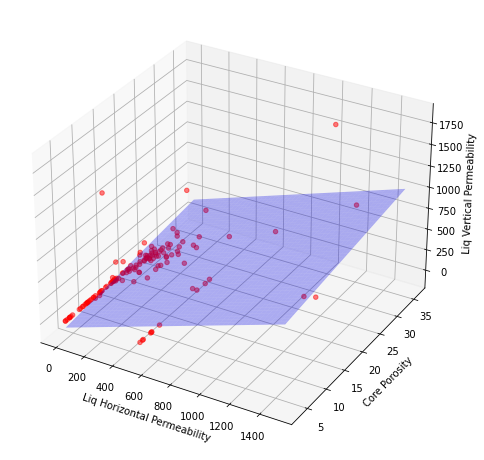

In [141]:
## convert the predicted result in an array
predictions=np.array(predictions)

# Visualize the Data for Multiple Linear Regression
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['CKHL'],df['CPOR'],df['CKVL'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,predictions.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('Liq Horizontal Permeability')
ax.set_ylabel('Core Porosity')
ax.set_zlabel('Liq Vertical Permeability')
plt.show()

In [142]:
results_formula.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CKVL   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     47.65
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           2.64e-16
Time:                        14:48:50   Log-Likelihood:                -904.85
No. Observations:                 135   AIC:                             1816.
Df Residuals:                     132   BIC:                             1824.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -104.9852     46.488     -2.258      0.026    -196.943     -13.027
CKHL           0.5637      0.065      8.617      0.000       0.434       0.693
CPOR           7.7293      2.651      2.916      0.004       2.486      12.973
==============================================================================
Omnibus:                      102.577   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1147.269
Skew:                           2.508   Prob(JB):                    7.48e-250
Kurtosis:                      16.372   Cond. No.                         841.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""